In the previous lesson began by looking at what sort of data a jpeg image stores.  After an initial exploration of this, we considered what sorts of capabilities this data and storage format permitted us.  We saw that we could use the information contained within the colors to do things like select those specific pixels which corresponded to water.  Quite importantly, we also began to get a sense of how we could move images relative to one another such that the pixels were as close to depicting the same peices of the earth's surface as possible.

In this lesson we will build on these insights in a fairly specific fashion.  Previously we were only selecting those pixels which corresponded to the ocean.  But what if we wanted to select pixels that corresponded to other aspects of the world?  Say, for example, I had a political map which somehow uniquely indicated a country of interest, and wished to perform an analysis on the sattalite image pixels that corresponded to this country.  How would I go about doing this.

In this lesson we'll be using maps of the united states to explore this capability.  We are shifting our focus from the entire world to the United states, in order to avoid as much of the skewing problems we observed in the previous lesson as possible (though we'll see that we can't entirely get away from them here either.


Lets begin by setting the path names, and establishing a standard image size for what we'll be looking at.

In [194]:
#set some names, because why not

#Path to the repo for this project
repoPath='/Users/plab/Documents/ipynb/'

#file name of geographical map of US
usGeoName='USA-satellite.jpg'

#file name of political map of US
usPolitical='Map_of_USA_with_states_modified.png'

#an image resolution that's a good comprimize of the two images we will be looking at
standardResize=[600,1000]


Lets begin by plotting the satallite photo of the United states and extracting a color that reprsents water for this map.

(675, 1082, 3)
(1000, 600)
[14 12 59]


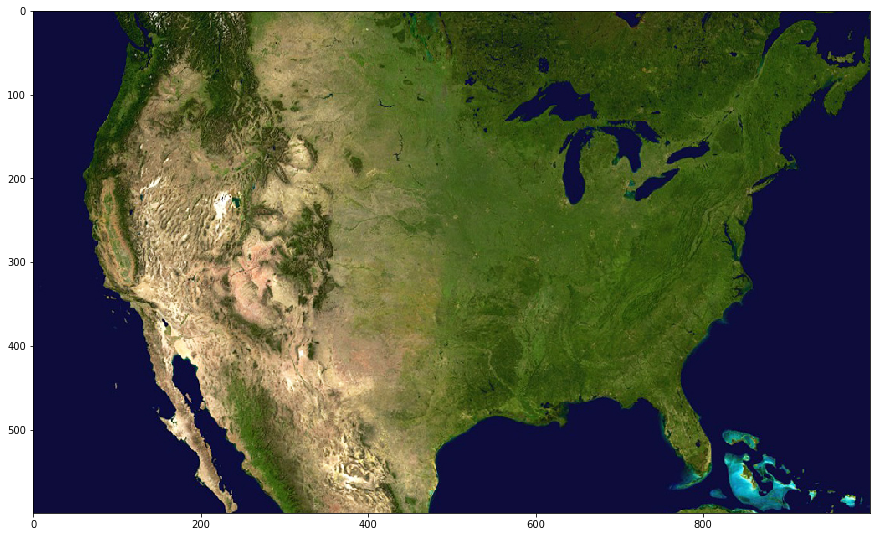

In [195]:
#loading image processing and manipulation package Pillow
# https://pillow.readthedocs.io/en/stable/
import PIL
from PIL import Image
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np

#extract the image data and print the size of the origonal file
usGeoMapPath=os.path.join(repoPath,'images',usGeoName) 
usGeoMap= Image.open(usGeoMapPath)
geoMapArray=np.asarray(usGeoMap)
usGeoMapShape=geoMapArray.shape
print(usGeoMapShape)

#resize to a standard resolution
geoMapImgResize=usGeoMap.resize([standardResize[1],standardResize[0]], resample=0)
print(geoMapImgResize.size)


#display the image
%matplotlib inline
geoResizeData=np.asarray(geoMapImgResize)
imshow(geoResizeData)
fig = plt.gcf()
fig.set_size_inches(15, 30)

WaterColor=geoResizeData[500,50]
print(WaterColor)

As we did in the prevous lesson, lets go ahead and compute the color distances from this water color.

In [196]:
import numpy as np
import matplotlib.pyplot as plt

#quick and dirty general use hypoteuse algorithm, can be used for 2d or 3D
def multiDHypot(coords1,coords2):
    dimDisplace=np.subtract(coords1,coords2)
    elementNum=dimDisplace.size
    elementSquare=np.square(dimDisplace)
    elementSquareSum=np.sum(elementSquare)
    if elementNum==1:
        hypotLeng=dimDisplace
    elif elementNum==2:
        hypotLeng=np.sqrt(elementSquareSum)
    elif elementNum==3:
        hypotLeng=np.sqrt(elementSquareSum)
    return hypotLeng


colorGeoDistMeasures=np.zeros([standardResize[0],standardResize[1]])

for iRows in range(standardResize[0]):
    for iColumns in range(standardResize[1]):
        #for all colors
        curPixelVal=geoResizeData[iRows,iColumns]
        
        #or maybe just a single color
        #curPixelVal=zeroBlueMask[iRows,iColumns,0]
        
        #could be done with raw input
        colorGeoDistMeasures[iRows,iColumns]=multiDHypot(curPixelVal,WaterColor)
        

flattenedDistances=np.ndarray.flatten(colorGeoDistMeasures)



Now that we have the color distance mapping, lets try and come up with a good threshold color distance we can use to make a mask for this data.  Keep in mind that this is only a rough approximation, and that we aren't going to get a perfect mask with this method.  What's the best cutoff value for this map?

In [197]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
from ipywidgets import FloatSlider

def updatePlots(colorGeoDistMeasures,geoCutVal):

    flattenedDistances=np.ndarray.flatten(colorGeoDistMeasures)

    plt.subplot(2, 1, 1)
    plt.hist(flattenedDistances, bins=100)
    plt.xlabel('Distance from ocean color')
    plt.ylabel('Number of pixels')
    plt.title('Distributon of RGB color distance from Atlantic pixel color')
    xposition = [geoCutVal]
    for xc in xposition:
        plt.axvline(x=xc, color='r', linestyle='--', linewidth=3)
    distHist = plt.gcf()
    distHist.set_size_inches(20, 10)
    
    
    geoOceanMask=colorGeoDistMeasures<geoCutVal
    plt.subplot(2, 1, 2)
    imshow(geoOceanMask)
    distMap = plt.gcf()
    distMap.set_size_inches(10, 10)

        
#def update_bound(minimum, maximum):
#    global upperBound
#    global lowerBound
#    lowerBound = minimum
#    upperBound = maximum
#    draw_adaptiveMatrix

def updateCut(geoCutVal):
    updatePlots(colorGeoDistMeasures,geoCutVal)


geoCutVal=FloatSlider(min=np.min(flattenedDistances), max=np.max(flattenedDistances), step=1,continuous_update=False)
interact(updateCut, geoCutVal=geoCutVal) 


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='geoCutVal', max=27.03701166…

<function __main__.updateCut(geoCutVal)>

It seems that a value around 5 should be just fine for this map.

Lets do the same thing for a political map of the united states as well.

(591, 958, 4)
(591, 958, 3)
(600, 1000, 3)
[158 199 243]


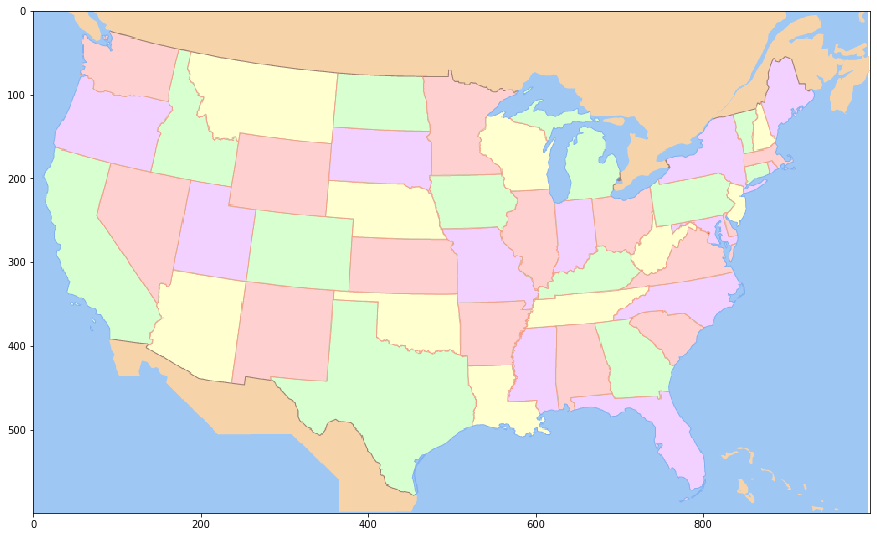

In [198]:
politicalMapPath=os.path.join(repoPath,'images',usPolitical)   

politicalMap= Image.open(politicalMapPath)
politicalMapData=np.asarray(politicalMap)
politicalMapShape=politicalMapData.shape
print(politicalMapShape)
#note that it appears to be a CMYK image

#lets convert it to RGB just for ease of use
rgb_Pol = politicalMap.convert('RGB')
rgb_PolData=np.asarray(rgb_Pol)
print(rgb_PolData.shape)

politicalResized=rgb_Pol.resize([standardResize[1],standardResize[0]], resample=0)
politicalResizedData=np.asarray(politicalResized)
print(politicalResizedData.shape)

%matplotlib inline
imshow(politicalResizedData)
fig = plt.gcf()
fig.set_size_inches(15, 30)

#lets extract the water color for this image as well.
politicalWater=politicalResizedData[500,50]
print(politicalWater)


Now we'll compute the color distances (from the political map's water color) for each pixel of the political map.

In [199]:
import numpy as np
import matplotlib.pyplot as plt

#quick and dirty general use hypoteuse algorithm, can be used for 2d or 3D
def multiDHypot(coords1,coords2):
    dimDisplace=np.subtract(coords1,coords2)
    elementNum=dimDisplace.size
    elementSquare=np.square(dimDisplace)
    elementSquareSum=np.sum(elementSquare)
    if elementNum==1:
        hypotLeng=dimDisplace
    elif elementNum>1:
        hypotLeng=np.sqrt(elementSquareSum)
    return hypotLeng


colorPoliticalDistMeasures=np.zeros([standardResize[0],standardResize[1]])
print(colorPoliticalDistMeasures.shape)

for iRows in range(standardResize[0]):
    for iColumns in range(standardResize[1]):
        #for all colors
        curPixelVal=politicalResizedData[iRows,iColumns]
        
        #or maybe just a single color
        #curPixelVal=zeroBlueMask[iRows,iColumns,0]
        
        #could be done with raw input
        colorPoliticalDistMeasures[iRows,iColumns]=multiDHypot(curPixelVal,politicalWater)


flattenedPoliticalDistances=np.ndarray.flatten(colorPoliticalDistMeasures)

(600, 1000)


As before, lets try and establish a threshold value that works well for this political map.

In [200]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
from ipywidgets import FloatSlider

def updatePlots(colorPoliticalDistMeasures,polCutVal):

    flattenedDistances=np.ndarray.flatten(colorPoliticalDistMeasures)

    plt.subplot(2, 1, 1)
    plt.hist(flattenedDistances, bins=100)
    plt.xlabel('Distance from ocean color')
    plt.ylabel('Number of pixels')
    plt.title('Distributon of RGB color distance from Atlantic pixel color')
    xposition = [polCutVal]
    for xc in xposition:
        plt.axvline(x=xc, color='r', linestyle='--', linewidth=3)
    distHist = plt.gcf()
    distHist.set_size_inches(20, 10)
    
    
    geoOceanMask=colorPoliticalDistMeasures<polCutVal
    plt.subplot(2, 1, 2)
    imshow(geoOceanMask)
    distMap = plt.gcf()
    distMap.set_size_inches(10, 10)


def updateCut(polCutVal):
    updatePlots(colorPoliticalDistMeasures,polCutVal)


polCutVal=FloatSlider(min=np.min(flattenedDistances), max=np.max(flattenedDistances), step=1,continuous_update=False)
interact(updateCut, polCutVal=polCutVal) 

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='polCutVal', max=27.03701166…

<function __main__.updateCut(polCutVal)>

Basically anything less than 5 should work, given that there are very few colors in this map, there's a decent amount of wiggle room available.

Now that we have both masks, lets try and shift the political map on to the sattilite map.

In [209]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider

geoThreshMap=colorGeoDistMeasures>geoCutVal.value
polThreshMap=colorPoliticalDistMeasures>polCutVal.value


def plot_mapDiscrepancy(map1,map2): 
    discrepancyMapping=np.logical_xor(map1,map2)
    %matplotlib inline
    imshow(discrepancyMapping)
    fig = plt.gcf()
    fig.set_size_inches(15, 30)
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Agree', 'Disagree'
    sizes = [np.sum(discrepancyMapping==0),np.sum(discrepancyMapping==1)]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,  labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
def update(xOffset, yOffset):
    polThreshMapMoved = np.roll(polThreshMap,yOffset,0)
    polThreshMapMoved = np.roll(polThreshMapMoved,xOffset,1)
    plot_mapDiscrepancy(geoThreshMap,polThreshMapMoved)
    

xOffset=IntSlider(min=-50, max=50, step=1,continuous_update=False)    
yOffset=IntSlider(min=-50, max=50, step=1,continuous_update=False)
    
interact(update, xOffset=xOffset,yOffset= yOffset )



interactive(children=(IntSlider(value=0, continuous_update=False, description='xOffset', max=50, min=-50), Int…

<function __main__.update(xOffset, yOffset)>

30
0


Should be able to ge it down to around 10.5% diagreement, with an x offset of between 19 and 24 and a y offset of -8.

Now why did we bother aligning these two images?  

Lets think back to the origional political map, and in particular the histogram of color distnaces.  Notice anything about the shape?  It's rather jagged, with only a few columns represented.  This is because there is a very limited number of colors occuring in the map, and thus a very limited number of distances from the color of water in the map.  Lets consider some of those values below.

[242 208 255]
[247 211 170]
[255 208 208]
[215 255 208]
[255 255 208]
(300, 500, 3)
[242 208 255]
[242 208 255]


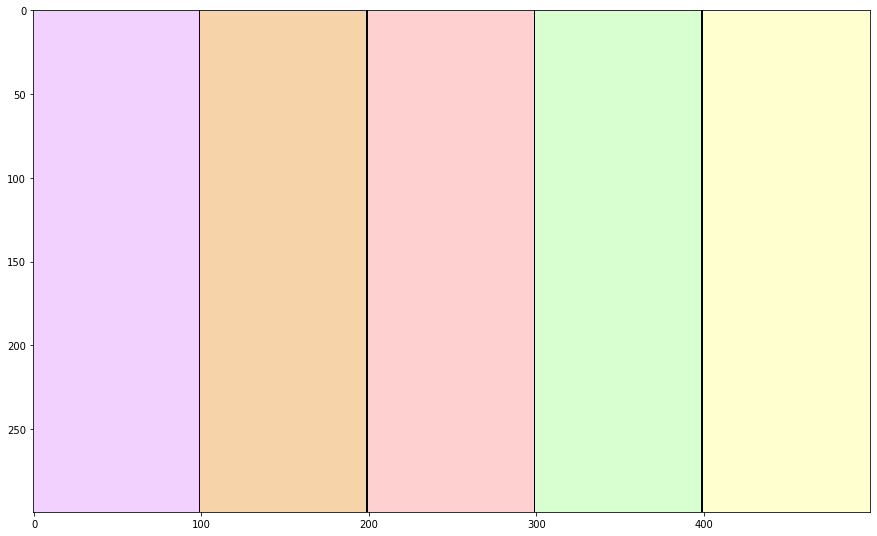

In [214]:
pinkPixel=politicalResizedData[150,100]
orangePixel=politicalResizedData[20,400]
redPixel=politicalResizedData[50,100]
greenPixel=politicalResizedData[450,400]
yellowPixel=politicalResizedData[400,200]

print(pinkPixel)
print(orangePixel)
print(redPixel)
print(greenPixel)
print(yellowPixel)

colorArray=np.zeros([300,500,3], dtype=int)
print(colorArray.shape)

print(pinkPixel.astype(int))

colorArray[0:300,0:99,:]=pinkPixel.astype(int)
colorArray[0:300,100:199,:]=orangePixel.astype(int)
colorArray[0:300,200:299,:]=redPixel.astype(int)
colorArray[0:300,300:399,:]=greenPixel.astype(int)
colorArray[0:300,400:500,:]=yellowPixel.astype(int)

%matplotlib inline
imshow(colorArray)
fig = plt.gcf()
fig.set_size_inches(15, 30)

print(colorArray[5,5,:])


Compare the color swatches above to the political map found earlier.

Note that multiple states are colored by the same color, but the color is uniform within those states.  What if we were to treat these colors just as we did with the ocean, and select pixels that were equal to these colors?  What could we do with this ability?

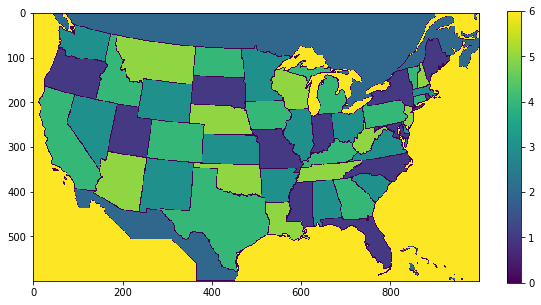

In [215]:
#this may take a moment.

intermediaryArray=[pinkPixel.astype(int),
                  orangePixel.astype(int),
                  redPixel.astype(int),
                  greenPixel.astype(int),
                  yellowPixel.astype(int),
                  politicalWater.astype(int)]

#create a blank parcellation array
selectionArray=np.zeros([standardResize[0],standardResize[1]], dtype=int)
                   
#precompute a parcellation
#iterate over the colors in the intermediaryArray
for iColors in range(len(intermediaryArray)):
    #set the current color
    currentColor=intermediaryArray[iColors]
    #create a temporary array to hold the distances for this color
    currentColorArray=np.zeros([standardResize[0],standardResize[1]])
    
    #iterate over the pixels
    for iRows in range(standardResize[0]):
        for iColumns in range(standardResize[1]):
            
            #extract the current pixel
            curPixelVal=politicalResizedData[iRows,iColumns]
        
            #compute the distance for this pixel
            currentColorArray[iRows,iColumns]=multiDHypot(curPixelVal,intermediaryArray[iColors])
            
    #for those pixels that are within 1 color distance of the current color, place the current index plus 1        
    selectionArray[currentColorArray<1]=iColors+1

#plot what we just did    
selectionHeatMap=imshow(selectionArray)
selectionMap= plt.gcf()
selectionMap.colorbar(selectionHeatMap)
selectionMap.set_size_inches(10, 5)    




The code above looks quite similar to previous instances where we have computed the distances, but this time we did something different.  Instead of doing this for one pixel color, we looped across the list of RGB color values in "intermediaryArray" with:

for iColors in range(len(intermediaryArray)):

and, after we had done this each time we created a "paint by numbers" representation of the political map where each pixel that was equal to our current color had a value (corresponding to the current entry in the array) placed in it.  We did this with this line:

selectionArray[currentColorArray<1]=iColors+1

Now that we have this lets look at the sections we can extract from the map

In [216]:
from ipywidgets import Dropdown

def extractPolitical(selectionArray,stateColor):
    selectionOutput=np.zeros([standardResize[0],standardResize[1]])
    selectionOutput=selectionArray==stateColor
    
    imshow(selectionOutput)
    selectionMap= plt.gcf()
    selectionMap.set_size_inches(10, 10)


def updatePolPlot(stateColor):
    extractPolitical(selectionArray,stateColor)

#stateColor=Dropdown(options=[('pink',pinkPixel), ('orange',orangePixel), ('red',redPixel),('green',greenPixel),('yellow',yellowPixel)],
stateColor=Dropdown(options=[('orange',2) ,('pink',1) , ('red',3),('green',4),('yellow',5),('blue',6)],
                    value=2,
                    description='colorSelect:')


interact(updatePolPlot, stateColor=stateColor) 

interactive(children=(Dropdown(description='colorSelect:', options=(('orange', 2), ('pink', 1), ('red', 3), ('…

<function __main__.updatePolPlot(stateColor)>

Lets think back to the masks for the geographic and political maps we made earlier and the way we aligned them.  Now that we have a rough data alignment, and a method for indexing to specific subsets of pixels, can we extract the actual satilite geographic data (RGB values) using the "paint by numbers" representation?

In [224]:
#first lets use np.roll to align the images.
#It isn't the most elegant way to align the images for various reasons, but straightforward enough for our purposes
xAlign=xOffset.value
print(xAlign)
yAlign=yOffset.value
print(yAlign)
    
extractPoliticalYShifted=np.roll(selectionArray,yAlign,0)
extractPoliticalXYShifted=np.roll(extractPoliticalYShifted,xAlign,1)


def extractPolitical(geoResizeData,extractPoliticalXYShifted,stateColor):
    selectionOutput=np.copy(geoResizeData)
    selectionOutput[extractPoliticalXYShifted!=stateColor]=[0,0,0]
    
    imshow(selectionOutput)
    selectionMap= plt.gcf()
    selectionMap.set_size_inches(10, 10)


def updatePolPlot(stateColor):
    extractPolitical(geoResizeData,extractPoliticalXYShifted,stateColor)

#stateColor=Dropdown(options=[('pink',pinkPixel), ('orange',orangePixel), ('red',redPixel),('green',greenPixel),('yellow',yellowPixel)],
stateColor=Dropdown(options=[('orange',2) ,('pink',1) , ('red',3),('green',4),('yellow',5),('blue',6)],
                    value=2,
                    description='colorSelect:')


interact(updatePolPlot, stateColor=stateColor) 

20
-6


interactive(children=(Dropdown(description='colorSelect:', options=(('orange', 2), ('pink', 1), ('red', 3), ('…

<function __main__.updatePolPlot(stateColor)>

#closing remarks

Admittedly, its not perfect a perfect alignment that we did, so the areas we are extracting aren't exactly on spot, but nonetheless you should have an idea of how we can use an aligmnent of two maps to leverage information from one to extract information from another.  For example, we could compute the average color of the terrain in the selection we've chosen.  If we used a population density map instead, we could roughly compute the number of people living in the pink, red, green, etc. states.  Lets solidify a couple intuitons about what we did here:

First, we should remember that the satellite imagery was our **raw data** of sorts.  In this case the **raw data** was simply 3 channels of RGB reflectance values (i.e. a "picture").  However, as alluded to above it could have been population densities, demographic information, or any number of other data domains.  

Second, we should remember that the political mapping was a discrete mapping with (in essence) each pixel assigned to one of some limited number of categories.  In the political mapping, the color mapping was arbitrary, but we could imagine it such that each state was colored with a distinct color such that there were 48 (it was a continental US map, after all) unique colors, and we could have indexed into the raw data using this spatial mapping of categories.  This act of dividing up into some number of discrete sections we shall refer to as **parcellation**, and as such, data objects that contain this sort of information are **parcellation maps**.  Furthermore, **parcellation maps** that use the same schema (roughly: conceptual framework) are said to be the same kind of **parcellation mapping**.

Third, and finally, it is also important to remember that the usefulness of these parcellations is *highly* dependent on how well aligned they are to the entity they represent.  In the case of geographic maps a misalignment can result in innaccurate data extraction, but for some **raw data** and **parcellation** types, a mismatch can be like an indexing error in a data array (more on this later with white matter).  Finally, on the topic of **parcellations** its also worth noting that in a practical sense, a parcellation is only really useful to the degree that we understand what the parcells are.  We didn't really need a guide to tell that the color divisions of the political map corresponded to various collections of states, nor would we likely need something to tell us which state was which if each had a different color.  However, if our parcellation corresponded to a categorical or conceptual framework that we weren't familiar with, we would need some index, dictionary, or guide to tell us what each unique value of the "paint by numbers" mapping corresponded to.

In the next section we will breifly set up some intuitions about the similarities and differences between jpeg images and brain images before moving on to an exploration of the specific data object features of brain images. 